# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [4]:
df = pd.read_csv('/content/RTA_Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [7]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [15]:
df.duplicated().sum()

0

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

for more clear result i will take the Features only then i will reprocessing it

In [10]:
# Time ,Day_of_week , Age_band_of_driver , Sex_of_driver , Educational_level,Type_of_vehicle , Cause_of_accident
X = df[['Time', 'Day_of_week' , "Age_band_of_driver" , "Sex_of_driver" , 'Educational_level' , 'Type_of_vehicle' , 'Cause_of_accident']]
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident
0,17:02:00,Monday,18-30,Male,Above high school,Automobile,Moving Backward
1,17:02:00,Monday,31-50,Male,Junior high school,Public (> 45 seats),Overtaking
2,17:02:00,Monday,18-30,Male,Junior high school,Lorry (41?100Q),Changing lane to the left
3,1:06:00,Sunday,18-30,Male,Junior high school,Public (> 45 seats),Changing lane to the right
4,1:06:00,Sunday,18-30,Male,Junior high school,NaN,Overtaking
...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Lorry (11?40Q),No distancing
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Automobile,No distancing
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Bajaj,Changing lane to the right
12314,13:55:00,Sunday,18-30,Female,Junior high school,Lorry (41?100Q),Driving under the influence of drugs


In [12]:
# Accident_severity
y = df['Accident_severity']


In [13]:
X.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Type_of_vehicle,950
Cause_of_accident,0


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Time                12316 non-null  object
 1   Day_of_week         12316 non-null  object
 2   Age_band_of_driver  12316 non-null  object
 3   Sex_of_driver       12316 non-null  object
 4   Educational_level   11575 non-null  object
 5   Type_of_vehicle     11366 non-null  object
 6   Cause_of_accident   12316 non-null  object
dtypes: object(7)
memory usage: 673.7+ KB


In [22]:
X['Type_of_vehicle'].nunique()

17

In [34]:
X.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident
11759,16:32:00,Monday,31-50,Male,Junior high school,Automobile,No distancing
4571,11:43:00,Sunday,18-30,Male,High school,Pick up upto 10Q,No priority to pedestrian
12163,17:35:00,Saturday,Over 51,Male,NaN,Other,Changing lane to the right
5441,19:00:00,Tuesday,Unknown,Male,Elementary school,Public (13?45 seats),No priority to pedestrian
2819,21:55:00,Thursday,31-50,Male,Elementary school,Lorry (41?100Q),Driving carelessly


In [36]:
X['Educational_level'] = X['Educational_level'].replace('nan' , np.nan)

<ipython-input-36-b0600d4b6f7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Educational_level'] = X['Educational_level'].replace('nan' , np.nan)


In [37]:
X['Educational_level'].isnull().sum()

741

In [38]:
X['Educational_level']= X['Educational_level'].fillna(X['Educational_level'].mode()[0])


<ipython-input-38-5d0f8b3cf366>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Educational_level']= X['Educational_level'].fillna(X['Educational_level'].mode()[0])


In [39]:
X['Educational_level'].isnull().sum()

0

In [40]:
X['Educational_level'].nunique()

7

In [41]:
X['Type_of_vehicle'] = X['Type_of_vehicle'].fillna(X['Type_of_vehicle'].mode()[0])
X['Type_of_vehicle'].unique()

<ipython-input-41-0ad9cef9b387>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Type_of_vehicle'] = X['Type_of_vehicle'].fillna(X['Type_of_vehicle'].mode()[0])


array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [82]:
X['Type_of_vehicle'].nunique()

17

In [42]:
X['Type_of_vehicle'].isnull().sum()

0

In [43]:
X.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Type_of_vehicle,0
Cause_of_accident,0


In [61]:
X.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident
1661,16:00:00,Wednesday,31-50,Male,Writing & reading,Special vehicle,Overspeed
2142,12:17:00,Tuesday,31-50,Male,Elementary school,Stationwagen,Moving Backward
9710,23:36:00,Thursday,Under 18,Male,High school,Pick up upto 10Q,No distancing
11314,21:55:00,Saturday,18-30,Female,High school,Other,Driving under the influence of drugs
3947,10:01:00,Friday,18-30,Male,Junior high school,Other,Driving carelessly


In [46]:
X['Cause_of_accident'].unique()

array(['Moving Backward', 'Overtaking', 'Changing lane to the left',
       'Changing lane to the right', 'Overloading', 'Other',
       'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving at high speed', 'Driving to the left', 'Unknown',
       'Overturning', 'Turnover', 'Driving under the influence of drugs',
       'Drunk driving'], dtype=object)

In [53]:
X['Cause_of_accident'] = X['Cause_of_accident'].replace('Unknown' , np.nan)
X['Cause_of_accident'] = X['Cause_of_accident'].fillna(X['Cause_of_accident'].mode()[0])
X['Cause_of_accident'].unique()

<ipython-input-53-4707e8220e4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cause_of_accident'] = X['Cause_of_accident'].replace('Unknown' , np.nan)
<ipython-input-53-4707e8220e4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cause_of_accident'] = X['Cause_of_accident'].fillna(X['Cause_of_accident'].mode()[0])


array(['Moving Backward', 'Overtaking', 'Changing lane to the left',
       'Changing lane to the right', 'Overloading', 'Other',
       'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving at high speed', 'Driving to the left', 'Overturning',
       'Turnover', 'Driving under the influence of drugs',
       'Drunk driving'], dtype=object)

In [54]:
X['Cause_of_accident'].isnull().sum()

0

In [47]:
X['Age_band_of_driver'].unique()

array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

In [48]:
X['Age_band_of_driver'] = X['Age_band_of_driver'].replace('Unknown' , np.nan)
X['Age_band_of_driver'].isnull().sum()

<ipython-input-48-e7cde7c97aec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age_band_of_driver'] = X['Age_band_of_driver'].replace('Unknown' , np.nan)


1548

In [49]:
X['Age_band_of_driver'] = X['Age_band_of_driver'].fillna(X['Age_band_of_driver'].mode()[0])

X['Age_band_of_driver'].isnull().sum()

<ipython-input-49-8793f0bd73b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age_band_of_driver'] = X['Age_band_of_driver'].fillna(X['Age_band_of_driver'].mode()[0])


0

In [50]:
X['Day_of_week'].unique()

array(['Monday', 'Sunday', 'Friday', 'Wednesday', 'Saturday', 'Thursday',
       'Tuesday'], dtype=object)

In [51]:
X['Sex_of_driver'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [52]:
X['Sex_of_driver'] = X['Sex_of_driver'].replace('Unknown', np.nan)
X['Sex_of_driver'] = X['Sex_of_driver'].fillna(X['Sex_of_driver'].mode()[0])
X['Sex_of_driver'].unique()

<ipython-input-52-8f34df302b47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex_of_driver'] = X['Sex_of_driver'].replace('Unknown', np.nan)
<ipython-input-52-8f34df302b47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex_of_driver'] = X['Sex_of_driver'].fillna(X['Sex_of_driver'].mode()[0])


array(['Male', 'Female'], dtype=object)

In [55]:
X['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [57]:
X['Time'].nunique()

1074

In [68]:
l_encoder = LabelEncoder()

X['Time_en'] = l_encoder.fit_transform(X['Time'])
X['Time_en'].sample(5)
X['Time'] = X['Time_en']

<ipython-input-68-c1f564e6e05d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Time_en'] = l_encoder.fit_transform(X['Time'])
<ipython-input-68-c1f564e6e05d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Time'] = X['Time_en']


In [80]:
X.drop(columns=['Time_en'] , inplace=True)

<ipython-input-80-d84a8e022885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Time_en'] , inplace=True)


In [73]:
l_encoder = LabelEncoder()

X['Day_of_week'] = l_encoder.fit_transform(X['Day_of_week'])
X['Day_of_week'].sample(5)

<ipython-input-73-3242da4e81c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Day_of_week'] = l_encoder.fit_transform(X['Day_of_week'])


,Day_of_week
31,4
3850,2
7810,0
410,6
4547,3


In [74]:
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Time_en
0,420,1,18-30,Male,Above high school,Automobile,Moving Backward,420
1,420,1,31-50,Male,Junior high school,Public (> 45 seats),Overtaking,420
2,420,1,18-30,Male,Junior high school,Lorry (41?100Q),Changing lane to the left,420
3,594,3,18-30,Male,Junior high school,Public (> 45 seats),Changing lane to the right,594
4,594,3,18-30,Male,Junior high school,Automobile,Overtaking,594
...,...,...,...,...,...,...,...,...
12311,374,6,31-50,Male,Junior high school,Lorry (11?40Q),No distancing,374
12312,476,3,18-30,Male,Elementary school,Automobile,No distancing,476
12313,246,3,Over 51,Male,Junior high school,Bajaj,Changing lane to the right,246
12314,246,3,18-30,Female,Junior high school,Lorry (41?100Q),Driving under the influence of drugs,246


In [75]:
l_encoder = LabelEncoder()

X['Age_band_of_driver'] = l_encoder.fit_transform(X['Age_band_of_driver'])
X['Age_band_of_driver'].sample(5)

<ipython-input-75-b7092292b689>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age_band_of_driver'] = l_encoder.fit_transform(X['Age_band_of_driver'])


,Age_band_of_driver
3876,0
8412,1
2372,0
6624,0
7923,0


In [76]:
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Time_en
0,420,1,0,Male,Above high school,Automobile,Moving Backward,420
1,420,1,1,Male,Junior high school,Public (> 45 seats),Overtaking,420
2,420,1,0,Male,Junior high school,Lorry (41?100Q),Changing lane to the left,420
3,594,3,0,Male,Junior high school,Public (> 45 seats),Changing lane to the right,594
4,594,3,0,Male,Junior high school,Automobile,Overtaking,594
...,...,...,...,...,...,...,...,...
12311,374,6,1,Male,Junior high school,Lorry (11?40Q),No distancing,374
12312,476,3,0,Male,Elementary school,Automobile,No distancing,476
12313,246,3,2,Male,Junior high school,Bajaj,Changing lane to the right,246
12314,246,3,0,Female,Junior high school,Lorry (41?100Q),Driving under the influence of drugs,246


In [77]:
l_encoder = LabelEncoder()

X['Sex_of_driver'] = l_encoder.fit_transform(X['Sex_of_driver'])

X['Educational_level'] =l_encoder.fit_transform(X['Educational_level'])

<ipython-input-77-6bf632098cce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex_of_driver'] = l_encoder.fit_transform(X['Sex_of_driver'])
<ipython-input-77-6bf632098cce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Educational_level'] =l_encoder.fit_transform(X['Educational_level'])


In [83]:
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident
0,420,1,0,1,0,Automobile,Moving Backward
1,420,1,1,1,4,Public (> 45 seats),Overtaking
2,420,1,0,1,4,Lorry (41?100Q),Changing lane to the left
3,594,3,0,1,4,Public (> 45 seats),Changing lane to the right
4,594,3,0,1,4,Automobile,Overtaking
...,...,...,...,...,...,...,...
12311,374,6,1,1,4,Lorry (11?40Q),No distancing
12312,476,3,0,1,1,Automobile,No distancing
12313,246,3,2,1,4,Bajaj,Changing lane to the right
12314,246,3,0,0,4,Lorry (41?100Q),Driving under the influence of drugs


In [90]:
ohe = OneHotEncoder(sparse_output=False)
# Type_of_vehicle_en = ohe.fit(X['Type_of_vehicle'].values.reshape(-1, 1))
Type_of_vehicle_reshaped = X['Type_of_vehicle'].values.reshape(-1, 1)

# Type_of_vehicle_en_df = pd.DataFrame(Type_of_vehicle_en, columns=ohe.get_feature_names_out(['Type_of_vehicle']))
Type_of_vehicle_en = ohe.fit_transform(Type_of_vehicle_reshaped)

Type_of_vehicle_en_df = pd.DataFrame(Type_of_vehicle_en, columns=ohe.get_feature_names_out(['Type_of_vehicle']))


In [92]:
print(Type_of_vehicle_en_df)


       Type_of_vehicle_Automobile  Type_of_vehicle_Bajaj  \
0                             1.0                    0.0   
1                             0.0                    0.0   
2                             0.0                    0.0   
3                             0.0                    0.0   
4                             1.0                    0.0   
...                           ...                    ...   
12311                         0.0                    0.0   
12312                         1.0                    0.0   
12313                         0.0                    1.0   
12314                         0.0                    0.0   
12315                         0.0                    0.0   

       Type_of_vehicle_Bicycle  Type_of_vehicle_Long lorry  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0 

In [96]:
X = pd.concat([X, Type_of_vehicle_en_df], axis=1)
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Type_of_vehicle_Automobile,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,...,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public (12 seats),Type_of_vehicle_Public (13?45 seats),Type_of_vehicle_Public (> 45 seats),Type_of_vehicle_Ridden horse,Type_of_vehicle_Special vehicle,Type_of_vehicle_Stationwagen,Type_of_vehicle_Taxi,Type_of_vehicle_Turbo
0,420,1,0,1,0,Automobile,Moving Backward,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,420,1,1,1,4,Public (> 45 seats),Overtaking,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,420,1,0,1,4,Lorry (41?100Q),Changing lane to the left,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,594,3,0,1,4,Public (> 45 seats),Changing lane to the right,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,594,3,0,1,4,Automobile,Overtaking,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,374,6,1,1,4,Lorry (11?40Q),No distancing,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12312,476,3,0,1,1,Automobile,No distancing,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12313,246,3,2,1,4,Bajaj,Changing lane to the right,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12314,246,3,0,0,4,Lorry (41?100Q),Driving under the influence of drugs,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
X.drop(columns=['Type_of_vehicle'], inplace= True)

In [100]:
ohe = OneHotEncoder(sparse_output=False)

Cause_of_accident_reshaped = X['Cause_of_accident'].values.reshape(-1, 1)
Cause_of_accident_en = ohe.fit_transform(Cause_of_accident_reshaped)

Cause_of_accident_en_df = pd.DataFrame(Cause_of_accident_en, columns=ohe.get_feature_names_out(['Cause_of_accident']))


In [101]:
X = pd.concat([X, Cause_of_accident_en_df], axis=1)
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Type_of_vehicle_Automobile,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,...,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover
0,420,1,0,1,0,Automobile,Moving Backward,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,420,1,1,1,4,Public (> 45 seats),Overtaking,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,420,1,0,1,4,Lorry (41?100Q),Changing lane to the left,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,594,3,0,1,4,Public (> 45 seats),Changing lane to the right,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,594,3,0,1,4,Automobile,Overtaking,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,374,6,1,1,4,Lorry (11?40Q),No distancing,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12312,476,3,0,1,1,Automobile,No distancing,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12313,246,3,2,1,4,Bajaj,Changing lane to the right,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12314,246,3,0,0,4,Lorry (41?100Q),Driving under the influence of drugs,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
X.drop(columns=['Cause_of_accident'], inplace= True)

In [105]:
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle_Automobile,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,Type_of_vehicle_Long lorry,Type_of_vehicle_Lorry (11?40Q),...,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover
0,420,1,0,1,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,420,1,1,1,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,420,1,0,1,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,594,3,0,1,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,594,3,0,1,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,374,6,1,1,4,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12312,476,3,0,1,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12313,246,3,2,1,4,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12314,246,3,0,0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [106]:
X.corr()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle_Automobile,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,Type_of_vehicle_Long lorry,Type_of_vehicle_Lorry (11?40Q),...,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover
Time,1.000000,0.019232,-0.046693,-0.021238,-0.022084,-0.003144,-0.015534,-0.004233,-0.023311,-0.003104,...,0.000011,-0.001932,0.011310,-0.014707,-0.003463,-0.003584,-0.002091,0.012584,-0.017073,0.000836
Day_of_week,0.019232,1.000000,0.018126,0.009757,-0.004517,0.003082,0.009407,0.005169,0.023498,-0.002974,...,-0.000115,0.013743,-0.006373,-0.002318,-0.018188,0.006366,0.000668,0.021558,0.006817,-0.002226
Age_band_of_driver,-0.046693,0.018126,1.000000,0.166643,-0.002930,-0.005151,0.002000,0.011712,0.007908,0.009381,...,0.008508,0.003687,0.014191,-0.015863,-0.000628,0.006963,0.018843,-0.004277,0.019837,-0.007476
Sex_of_driver,-0.021238,0.009757,0.166643,1.000000,0.003874,-0.005564,0.004704,0.010153,0.013728,0.009906,...,0.008130,-0.010608,0.011999,-0.010962,-0.000084,0.006893,0.007348,-0.001003,0.007952,0.006360
Educational_level,-0.022084,-0.004517,-0.002930,0.003874,1.000000,0.002815,-0.000052,-0.012106,-0.001648,-0.000208,...,0.007233,-0.006394,0.007057,-0.000697,-0.004108,0.004930,0.021485,-0.007014,0.001613,-0.006203
Type_of_vehicle_Automobile,-0.003144,0.003082,-0.005151,-0.005564,0.002815,1.000000,-0.034665,-0.029489,-0.127832,-0.152944,...,-0.003907,0.002255,0.002750,-0.003004,0.001965,-0.007224,-0.016094,0.001808,0.001151,-0.009340
Type_of_vehicle_Bajaj,-0.015534,0.009407,0.002000,0.004704,-0.000052,-0.034665,1.000000,-0.002008,-0.008704,-0.010413,...,-0.009707,0.006946,-0.004979,0.012159,-0.000654,-0.003371,-0.003428,-0.000114,-0.005376,-0.003879
Type_of_vehicle_Bicycle,-0.004233,0.005169,0.011712,0.010153,-0.012106,-0.029489,-0.002008,1.000000,-0.007404,-0.008859,...,-0.006382,0.000500,-0.010306,0.019473,0.002319,-0.002867,-0.002916,-0.007861,-0.004573,0.021509
Type_of_vehicle_Long lorry,-0.023311,0.023498,0.007908,0.013728,-0.001648,-0.127832,-0.008704,-0.007404,1.000000,-0.038401,...,0.005885,-0.015818,0.001153,0.010171,-0.017788,-0.005655,0.014013,0.021986,0.005847,-0.008406
Type_of_vehicle_Lorry (11?40Q),-0.003104,-0.002974,0.009381,0.009906,-0.000208,-0.152944,-0.010413,-0.008859,-0.038401,1.000000,...,-0.017717,0.011711,-0.011259,0.009302,-0.004261,0.008081,0.001809,-0.010551,0.030642,-0.012118


<Axes: >

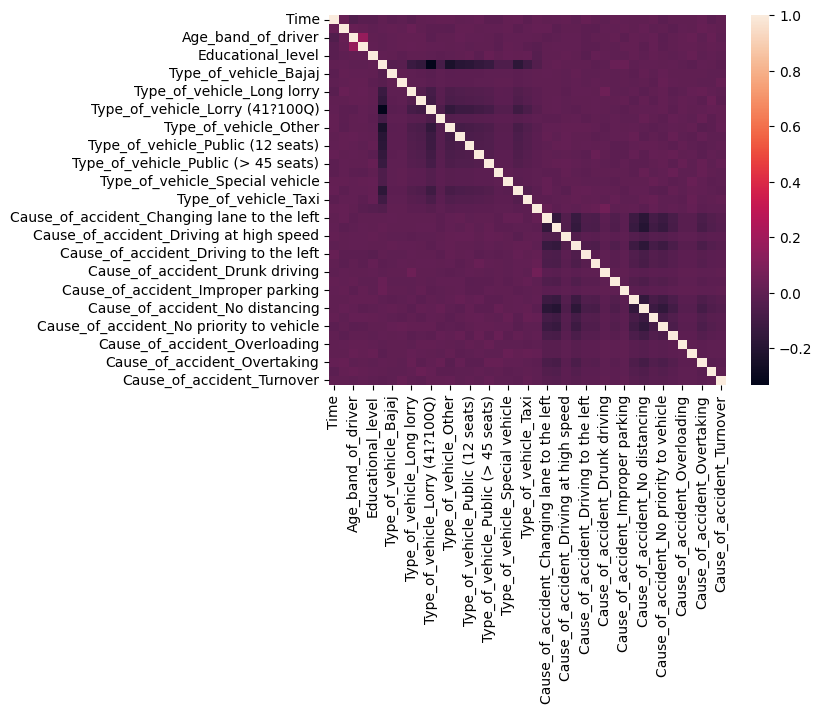

In [108]:
sns.heatmap(X.corr())

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 41 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Time                                                    12316 non-null  int64  
 1   Day_of_week                                             12316 non-null  int64  
 2   Age_band_of_driver                                      12316 non-null  int64  
 3   Sex_of_driver                                           12316 non-null  int64  
 4   Educational_level                                       12316 non-null  int64  
 5   Type_of_vehicle_Automobile                              12316 non-null  float64
 6   Type_of_vehicle_Bajaj                                   12316 non-null  float64
 7   Type_of_vehicle_Bicycle                                 12316 non-null  float64
 8   Type_of_vehicle_Long lorry          

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [111]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression


m_log = LogisticRegression(random_state=42).fit(X_train, y_train)
m_log.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Slight Injury', 'Slight Injury', 'Slight Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

#### Decision Tree Classifier

In [121]:
from sklearn.tree import DecisionTreeClassifier

m_tree = DecisionTreeClassifier(max_depth= 5).fit(X_train, y_train)
m_tree.predict(X_test)


array(['Slight Injury', 'Slight Injury', 'Slight Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

#### Support Vector Machine (SVM)

In [126]:
 from sklearn import svm

m_svm = svm.SVC().fit(X_train, y_train)

m_svm.predict(X_test)

array(['Slight Injury', 'Slight Injury', 'Slight Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

#### K-Neighbors Classifier

In [129]:
from sklearn.neighbors import KNeighborsClassifier

m_kn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
m_kn.predict(X_test)

array(['Slight Injury', 'Slight Injury', 'Slight Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

Logistic Regression

In [141]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# confusion_matrix
y_train_pred = cross_val_predict(m_log, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[[   0    0  121]
 [   0    0 1380]
 [   0    0 8351]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
from sklearn.metrics import accuracy_score
# Accuracy
y_train_pred = cross_val_predict(m_log, X_train, y_train, cv=3)
print(accuracy_score(y_train, y_train_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8476451481932602


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:

# Precision
from sklearn.metrics import precision_score

y_train_pred = cross_val_predict(m_log, X_train, y_train, cv=3)

precision_score(y_train, y_train_pred, average='micro')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8476451481932602

In [147]:
# recal
from sklearn.metrics import recall_score
y_train_pred = cross_val_predict(m_log, X_train, y_train, cv=3)

recall_score(y_train, y_train_pred, average='micro')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8476451481932602

In [149]:
#  f1_score
from sklearn.metrics import f1_score


y_train_pred = cross_val_predict(m_log, X_train, y_train, cv=3)
f1_score(y_train, y_train_pred, average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.        , 0.        , 0.91754106])

In [152]:
# ROC Curve and AUC
from sklearn.metrics import roc_auc_score

**Decision Tree Classifier**

In [154]:


y_train_pred = cross_val_predict(m_tree, X_train, y_train, cv=3)

# confusion_matrix
print(confusion_matrix(y_train, y_train_pred))

# Accuracy
print(accuracy_score(y_train, y_train_pred))

# Precision
print(precision_score(y_train, y_train_pred, average='micro'))

# recal
print(recall_score(y_train, y_train_pred, average='micro'))

#  f1_score
print(f1_score(y_train, y_train_pred, average=None))

[[   0    0  121]
 [   0    9 1371]
 [   0   46 8305]]
0.8438895655704426
0.8438895655704426
0.8438895655704426
[0.         0.01254355 0.91525237]


**Support Vector Machine (SVM)**

In [155]:

y_train_pred = cross_val_predict(m_svm, X_train, y_train, cv=3)

# confusion_matrix
print(confusion_matrix(y_train, y_train_pred))

# Accuracy
print(accuracy_score(y_train, y_train_pred))

# Precision
print(precision_score(y_train, y_train_pred, average='micro'))

# recal
print(recall_score(y_train, y_train_pred, average='micro'))

#  f1_score
print(f1_score(y_train, y_train_pred, average=None))

[[   0    0  121]
 [   0    0 1380]
 [   0    0 8351]]
0.8476451481932602
0.8476451481932602
0.8476451481932602
[0.         0.         0.91754106]


## **K-Neighbors Classifier**

In [156]:

y_train_pred = cross_val_predict(m_kn, X_train, y_train, cv=3)

# confusion_matrix
print(confusion_matrix(y_train, y_train_pred))

# Accuracy
print(accuracy_score(y_train, y_train_pred))

# Precision
print(precision_score(y_train, y_train_pred, average='micro'))

# recal
print(recall_score(y_train, y_train_pred, average='micro'))

#  f1_score
print(f1_score(y_train, y_train_pred, average=None))

[[  14    4  103]
 [   6  164 1210]
 [  28  326 7997]]
0.8297807551766139
0.8297807551766139
0.8297807551766139
[0.16568047 0.17502668 0.90561123]


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

#### **Compare** **Metrics**

1.   depending on **accuracy** the best model is Support Vector Machine (SVM) and Logistic Regression

2.   **recall score** best model is Support Vector Machine (SVM)
3. we can evaluate each of compare matrix but there is no time and we can see it in cell above.





#### Justify Your Choice
i think the best choice is K-Neighbors Classifier because compare it with all the model with all metrics its best choice

there is a lot of topic to discuss but there is no time and in shallah we will discuss it later